In [1]:
%pip install httpx
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install tables
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import io
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.lines as mlines
from scipy.spatial import transform as scipy_transform
from datetime import datetime

In [5]:
import os
os.environ['CLICKHOUSE_USER']= 'backend'
os.environ ['CLICKHOUSE_PASSWORD']='rB0jh2YjzNOaB7'
link = 'http://api.sensorehab.com:8123'
os.environ ['CLICKHOUSE_URL']=link
import httpx


class Clickhouse:
    credentials = {
        "user": os.environ['CLICKHOUSE_USER'],
        "password": os.environ['CLICKHOUSE_PASSWORD'],
    }
    url = os.environ['CLICKHOUSE_URL']

    def __init__(self):
        self._httpx_client = httpx.Client()

    def post(
        self,
        query: str,
        headers: dict = None,
        content: bytes = None,
    ) -> str:
        response = self._httpx_client.post(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
            content=content,
        )
        return response.text

    def get(
        self,
        query: str,
        headers: dict = None,
    ) -> str:
        response = self._httpx_client.get(
            url=self.url,
            params={
                "query": query,
                **self.credentials,
            },
            headers=headers,
        )
        return response.text


In [6]:
df = None
df = pd.read_hdf('.\data\dataset_gross_prod.h5')
print ('HI')

HI


In [7]:
df.head(30000)

,game_result_id,game_id,patient_id,exercise_id,timestamp,src,side,h_rssi,h_gain,g_rssi,...,shoulder_quat_z,shoulder_quat_w,shoulder_lia_x,shoulder_lia_y,shoulder_lia_z,shoulder_grv_x,shoulder_grv_y,shoulder_grv_z,shoulder_tilt,position_type
0,13237,12,588,7,1991-11-02 23:44:14,00:00:00:00:00:00,1,0,0,0,...,0.298123,0.556285,-0.081,-0.260,0.203,-8.744,-4.368,-2.190,0.0,0
1,13237,12,588,7,1991-11-02 23:44:29,00:00:00:00:00:00,1,0,0,0,...,0.297180,0.556392,0.036,0.012,-0.030,-8.391,-4.540,-2.152,0.0,0
2,13237,12,588,7,1991-11-02 23:44:42,00:00:00:00:00:00,1,0,0,0,...,0.290600,0.552338,-0.008,0.319,0.006,-8.295,-4.864,-2.000,0.0,0
3,13237,12,588,7,1991-11-02 23:44:58,00:00:00:00:00:00,1,0,0,0,...,0.289881,0.551843,0.020,0.337,0.028,-8.294,-4.902,-2.019,0.0,0
4,13237,12,588,7,1991-11-02 23:45:15,00:00:00:00:00:00,1,0,0,0,...,0.289319,0.551413,-0.087,0.310,-0.015,-8.299,-4.850,-1.910,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13289,12,618,7,1992-03-29 03:50:05,00:00:00:00:00:00,2,0,0,0,...,0.018179,-0.234243,-0.109,0.039,0.128,-7.135,-5.773,-3.813,0.0,0
29996,13289,12,618,7,1992-03-29 03:50:22,00:00:00:00:00:00,2,0,0,0,...,0.018298,-0.234041,-0.112,0.043,0.128,-7.135,-5.773,-3.813,0.0,0
29997,13289,12,618,7,1992-03-29 03:50:38,00:00:00:00:00:00,2,0,0,0,...,0.018457,-0.233398,-0.158,0.062,0.166,-7.192,-5.763,-3.823,0.0,0
29998,13289,12,618,7,1992-03-29 03:50:55,00:00:00:00:00:00,2,0,0,0,...,0.018488,-0.232953,-0.141,0.114,0.098,-7.154,-5.744,-3.746,0.0,0


In [8]:
def calc_ang_to_Y(row):
    w, x, y, z = row.to_list()
    rotation = scipy_transform.Rotation.from_quat([x, y, z, w])
    vec = rotation.apply([0, 1, 0])
    rad_angle = np.arcsin(vec[2])
    deg_angle = math.degrees(rad_angle)
    return -deg_angle

In [9]:
forearm_quat = [
    'forearm_quat_x', 
    'forearm_quat_y', 
    'forearm_quat_z', 
    'forearm_quat_w',
]
df['forearm_y_ang'] = df[forearm_quat].apply(calc_ang_to_Y, axis=1)
df['forearm_y_ang'].head(5)

0   -69.104216
1   -69.387333
2   -69.699882
3   -69.699469
4   -69.695340
Name: forearm_y_ang, dtype: float64

In [220]:
#Добавление элемента в массив маркеров
def add_sorted_marker_position(mark_locs, position):
    if not mark_locs:
        mark_locs.append(position)
    else:
        index = 0
        while index < len(mark_locs) and mark_locs[index] < position:
            index += 1
        mark_locs.insert(index, position)
    return mark_locs


In [221]:
#Удаление элемента из массива маркеров
def remove_marker_by_index(mark_locs, index):
    del mark_locs[index]
    return mark_locs

In [222]:
def plot_game_result(result_id, patient_id,max_x, per, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]


    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type'] == 2].index    
    if frame_range:
        start_mark_locs = [i - frame_range[0] for i in start_mark_locs]
        end_mark_locs = [i - frame_range[0] for i in end_mark_locs]

    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )

    tick_range_x = range(0, max_x, per)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()

    return start_mark_locs, end_mark_locs

   

In [223]:
def new_plot_game_result(start_mak_locs, end_mark_locs, result_id, patient_id, max_x, per, frame_range=(0,-1)):
    defprops = {
        'xdata': [],
        'ydata': [],
        'linestyle': 'None',
        'markersize': 10
    }
    black_arrow = mlines.Line2D(
        **defprops,
        marker='^',
        color='black',
        label='start position',
    )
    red_arrow = mlines.Line2D(
        **defprops,
        marker='v',
        color='red',
        label='end position',
    )
    plt.legend(handles=[black_arrow, red_arrow])

    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    
    assert len(exercise_ids := result_df['exercise_id'].unique()) == 1

    exercise_id = exercise_ids[0]

    result_df['forearm_y_ang'].plot(
        title= f'patient {patient_id}, result {result_id}, exercise {exercise_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='^',
        markersize=10,
        markerfacecolor='black',
        markevery= start_mark_locs,
    )
    ax = result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='v',
        markersize=10,
        markerfacecolor='red',
        markevery=end_mark_locs,

    )
    tick_range_x = range(0, max_x, per)
    plt.xticks(tick_range_x)
    new_figure=True
    if new_figure:
        plt.figure()

In [237]:
def mark_ranges(start_mark_locs, end_mark_locs):
    df['position_type_window'] = 0

    #  # 'ArrowDown' positionType = 1;
    # start_mark_locs = df.loc[df['position_type'] == 1].index
    #  # 'ArrowUp' positionType = 2;
    # end_mark_locs = df.loc[df['position_type'] == 2].index   

    for mark_loc in start_mark_locs:
        df.loc[max(mark_loc - 55, 0): mark_loc + 15, 'position_type_window'] = 1
    for mark_loc in end_mark_locs:
        df.loc[max(mark_loc - 55, 0): mark_loc + 15, 'position_type_window'] = 2

In [247]:
def plot_mark_ranges(result_id):
    result_df = df.loc[df['game_result_id'] == result_id].reset_index(drop=True)
    # result_df = result_df.iloc[0:2500]

    patient_ids = result_df['patient_id'].unique()
    assert len(patient_ids) == 1
    patient_id = patient_ids[0]
    
    # 'ArrowDown' positionType = 1;
    start_mark_locs = result_df.loc[result_df['position_type_window'] == 1].index
    # 'ArrowUp' positionType = 2;
    end_mark_locs = result_df.loc[result_df['position_type_window'] == 2].index  

    result_df['forearm_y_ang'].plot(
        title=f'patient {patient_id}, result {result_id}',
        figsize=(25, 6),
        color='tab:blue',
        marker='o',
        markeredgewidth=0,
        markersize=5,
        markerfacecolor='black',
        markevery=start_mark_locs,
    )
    result_df['forearm_y_ang'].plot(
        figsize=(25, 6),
        color='tab:blue',
        marker='o',
        markeredgewidth=0,
        markersize=5,
        markerfacecolor='red',
        markevery=end_mark_locs,
    )
    plt.figure()


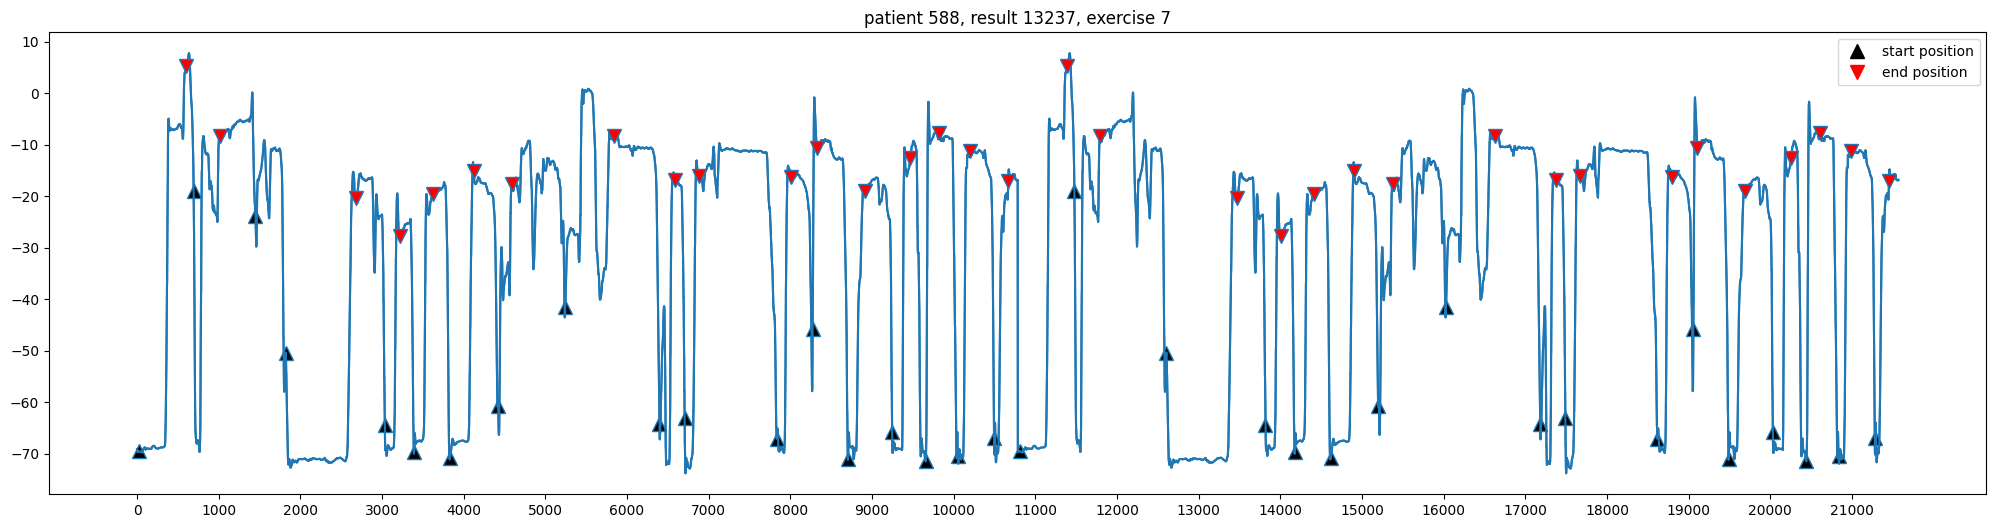

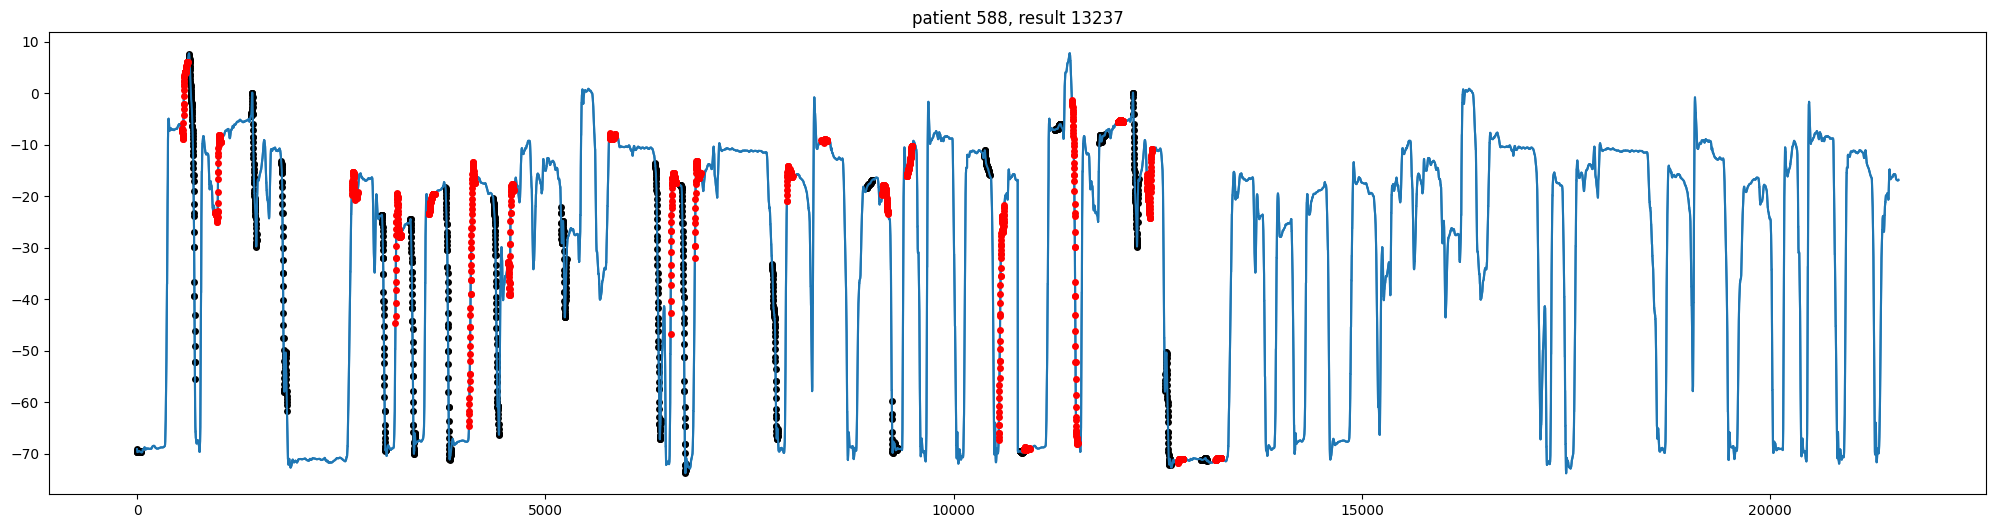

<Figure size 640x480 with 0 Axes>

In [252]:
start_mark_locs, end_mark_locs = plot_game_result(13237, 588, 22000, 1000)
mark_ranges(start_mark_locs, end_mark_locs)
plot_mark_ranges(13237)

[29, 694, 1450, 1821, 3033, 3392, 3832, 4417, 5245, 6397, 6705, 7832, 8273, 8704, 9246, 9656, 10051, 10494, 10814, 11479, 12606, 13818, 14177, 14617, 15202, 16030, 17182, 17490, 18617, 19058, 19489, 20031, 20441, 20836, 21279]
[29, 694, 1450, 1450, 1821, 3033, 3392, 3832, 4417, 5245, 5640, 6397, 6705, 7832, 8273, 8704, 9246, 9656, 10051, 10494, 10814, 11479, 12606, 13818, 14177, 14617, 15202, 16030, 17182, 17490, 18617, 19058, 19489, 20031, 20441, 20836, 21279]


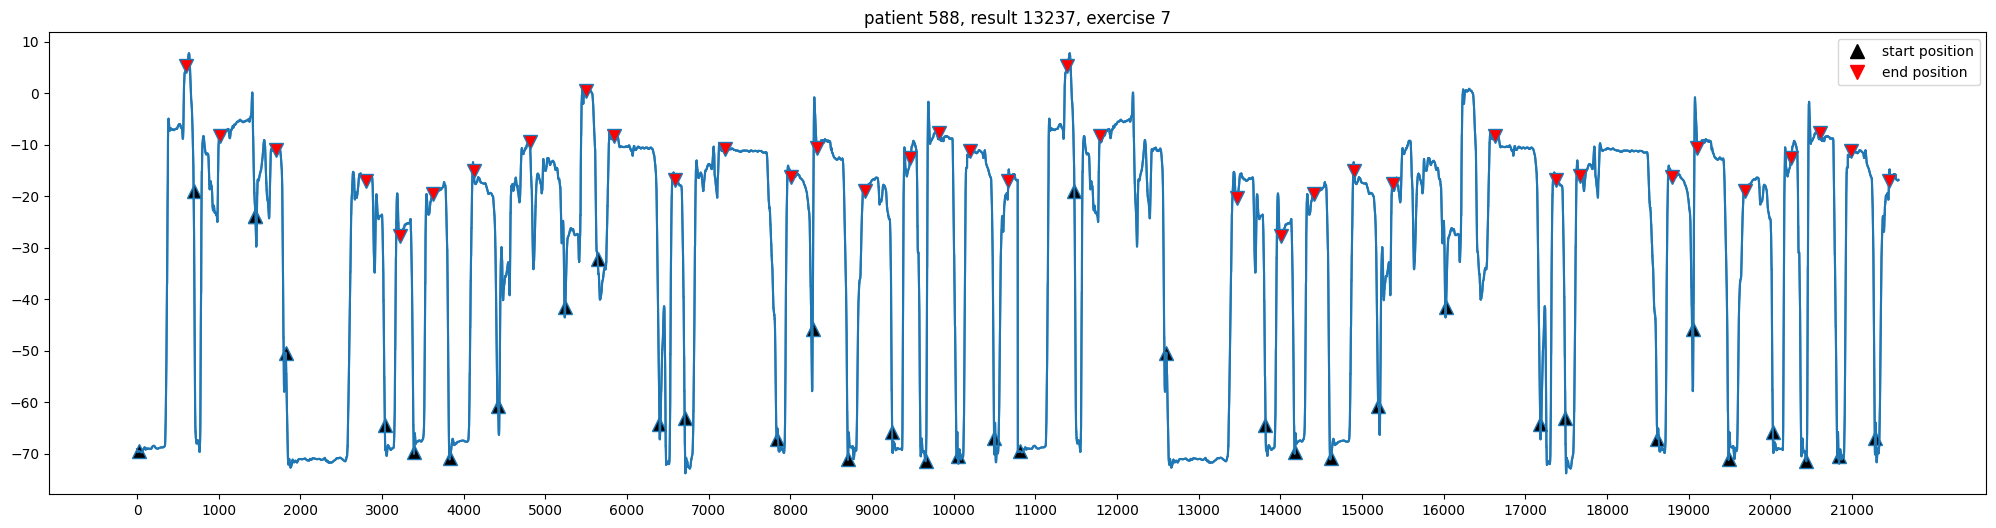

<Figure size 640x480 with 0 Axes>

In [254]:
print (start_mark_locs)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 1450)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 5640)

end_mark_locs = add_sorted_marker_position(end_mark_locs, 1700)
end_mark_locs = remove_marker_by_index(end_mark_locs, 3)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2800)
end_mark_locs = remove_marker_by_index(end_mark_locs, 7)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 4810)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 5500)
end_mark_locs = remove_marker_by_index(end_mark_locs, 11)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 7200)
print (start_mark_locs)

new_plot_game_result(start_mark_locs, end_mark_locs, 13237, 588, 22000, 1000) 
# mark_ranges(start_mark_locs, end_mark_locs)
# plot_mark_ranges(13237)


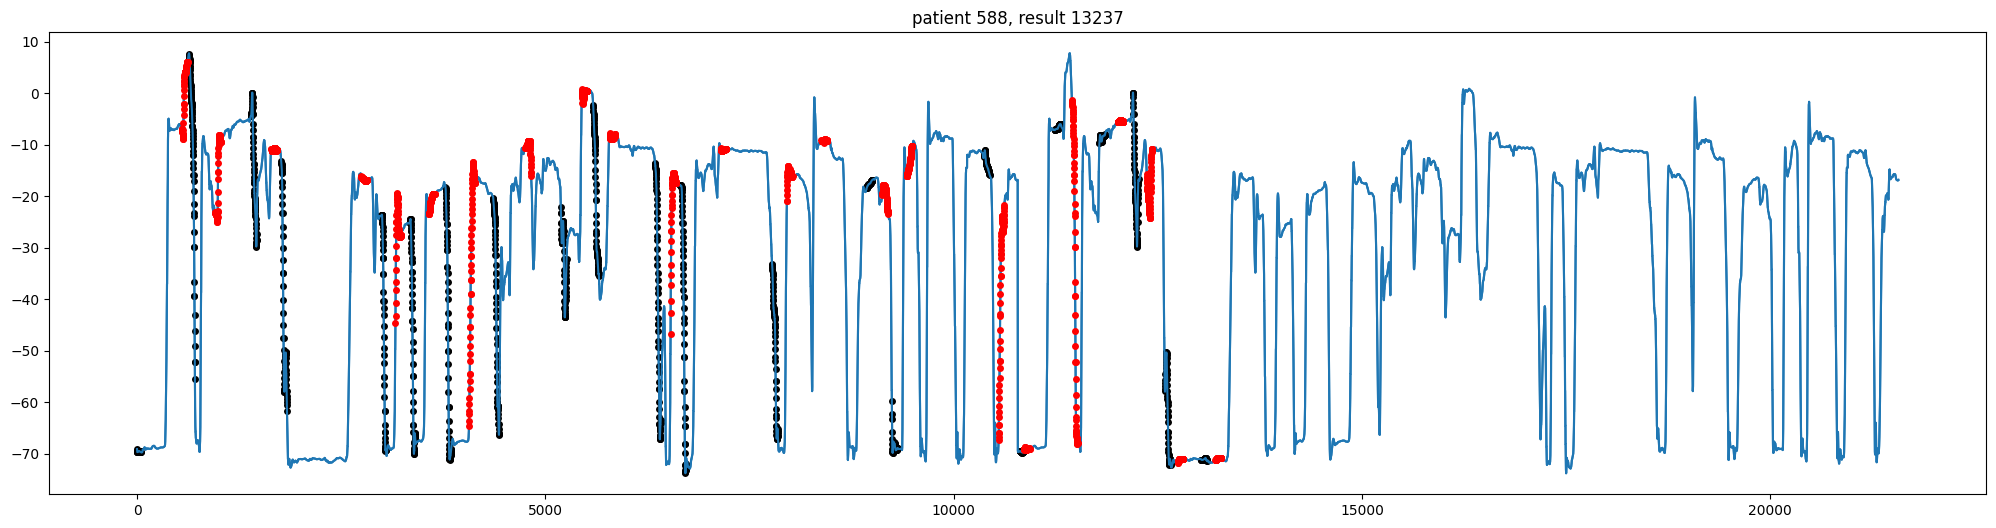

<Figure size 640x480 with 0 Axes>

In [255]:
mark_ranges(start_mark_locs, end_mark_locs)
plot_mark_ranges(13237)

TypeError: mark_ranges() missing 2 required positional arguments: 'start_mark_locs' and 'end_mark_locs'

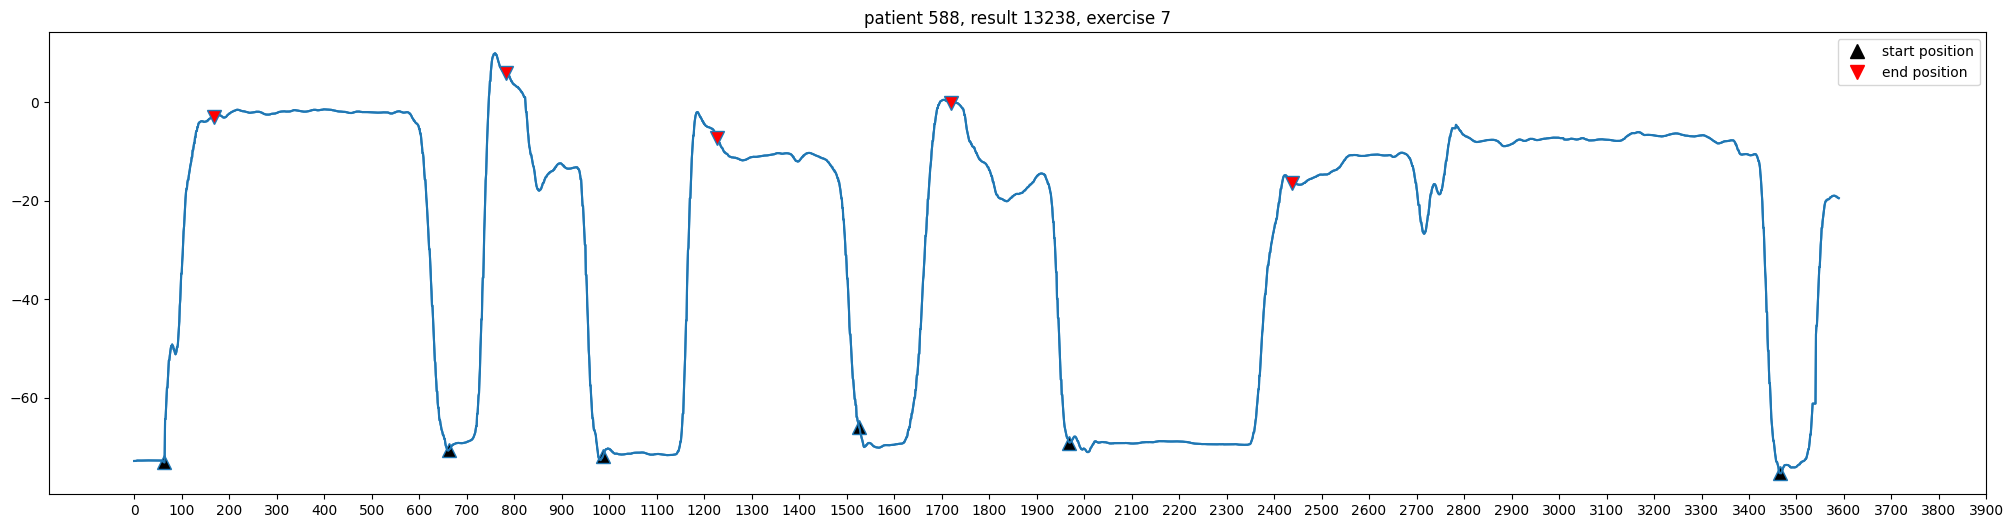

<Figure size 640x480 with 0 Axes>

In [256]:
start_mark_locs, end_mark_locs = plot_game_result(13238, 588, 4000, 100) 
mark_ranges()


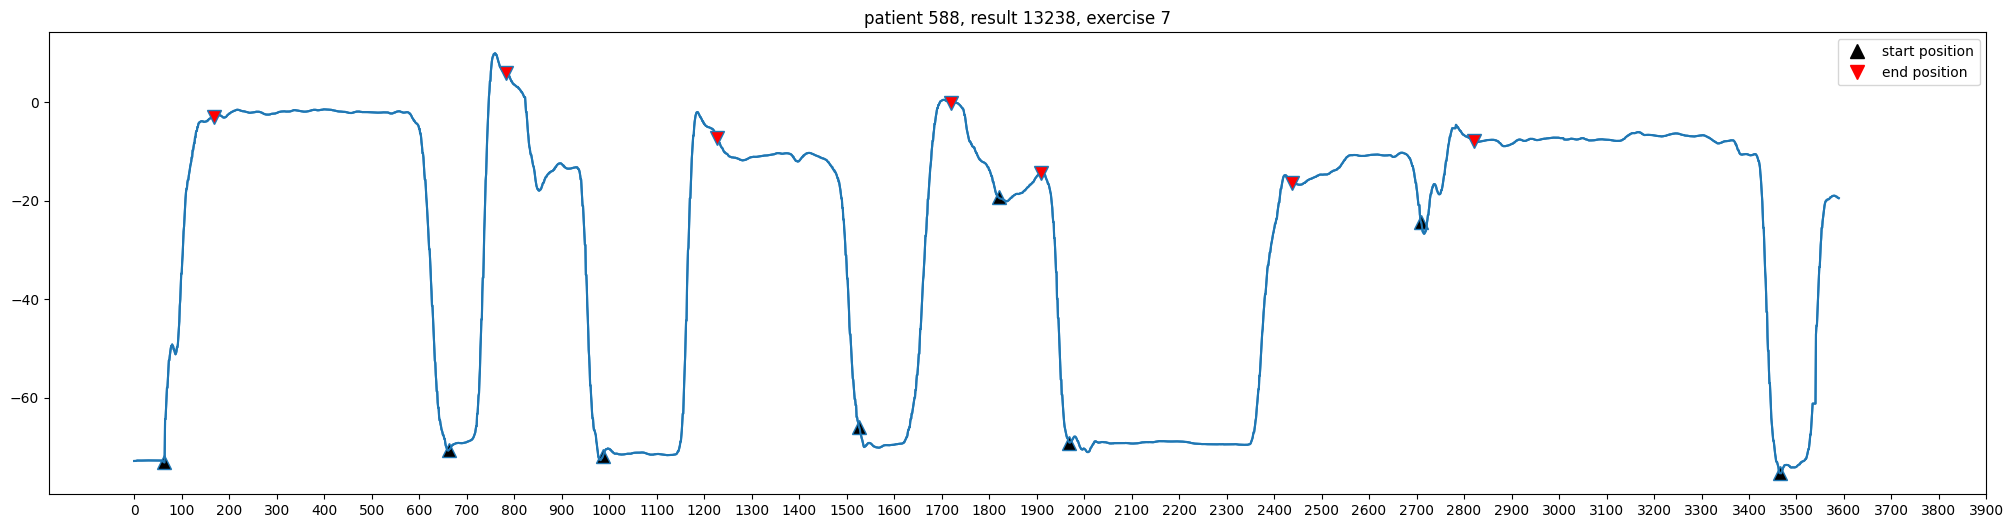

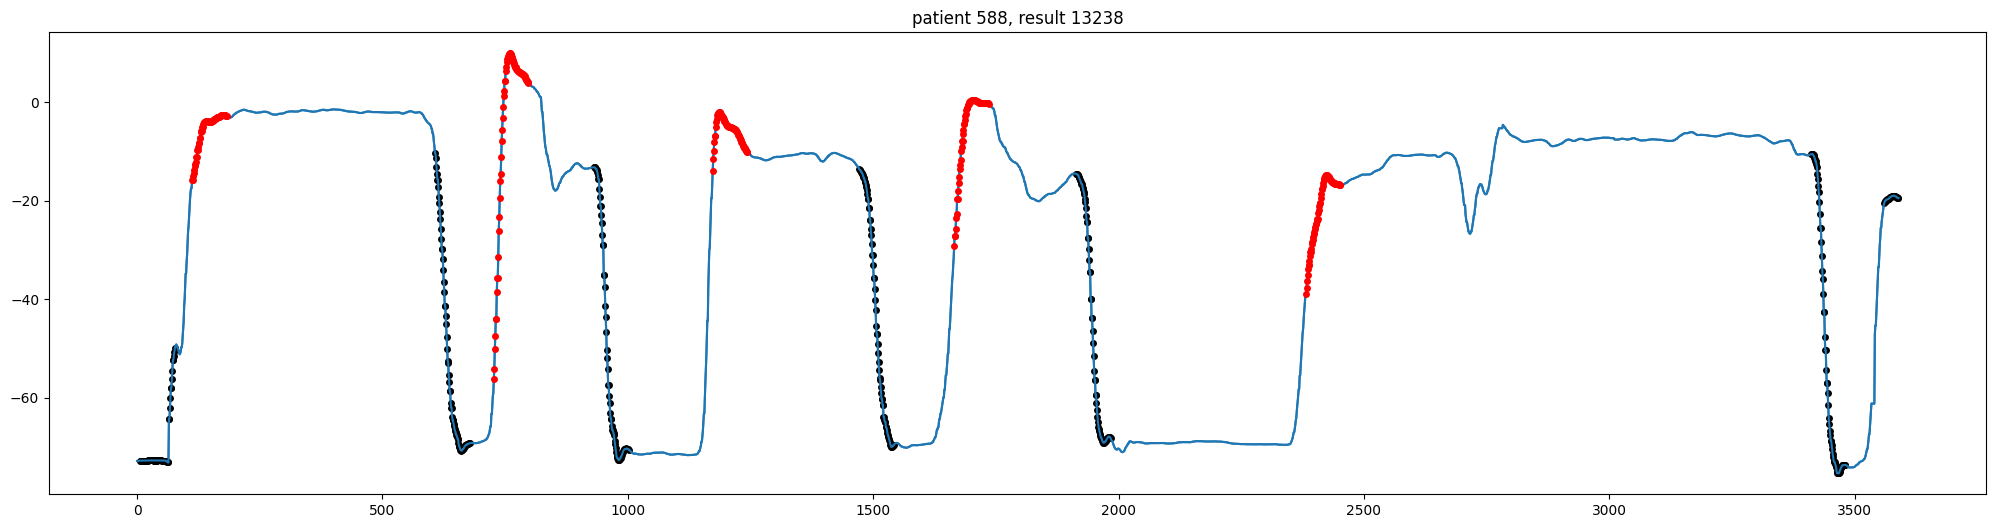

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs = add_sorted_marker_position(start_mark_locs, 1820)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 2710)
    
end_mark_locs = add_sorted_marker_position(end_mark_locs, 1910)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2820)
new_plot_game_result (start_mark_locs, end_mark_locs, 13238, 588, 4000, 100)
mark_ranges()
plot_mark_ranges(13238)

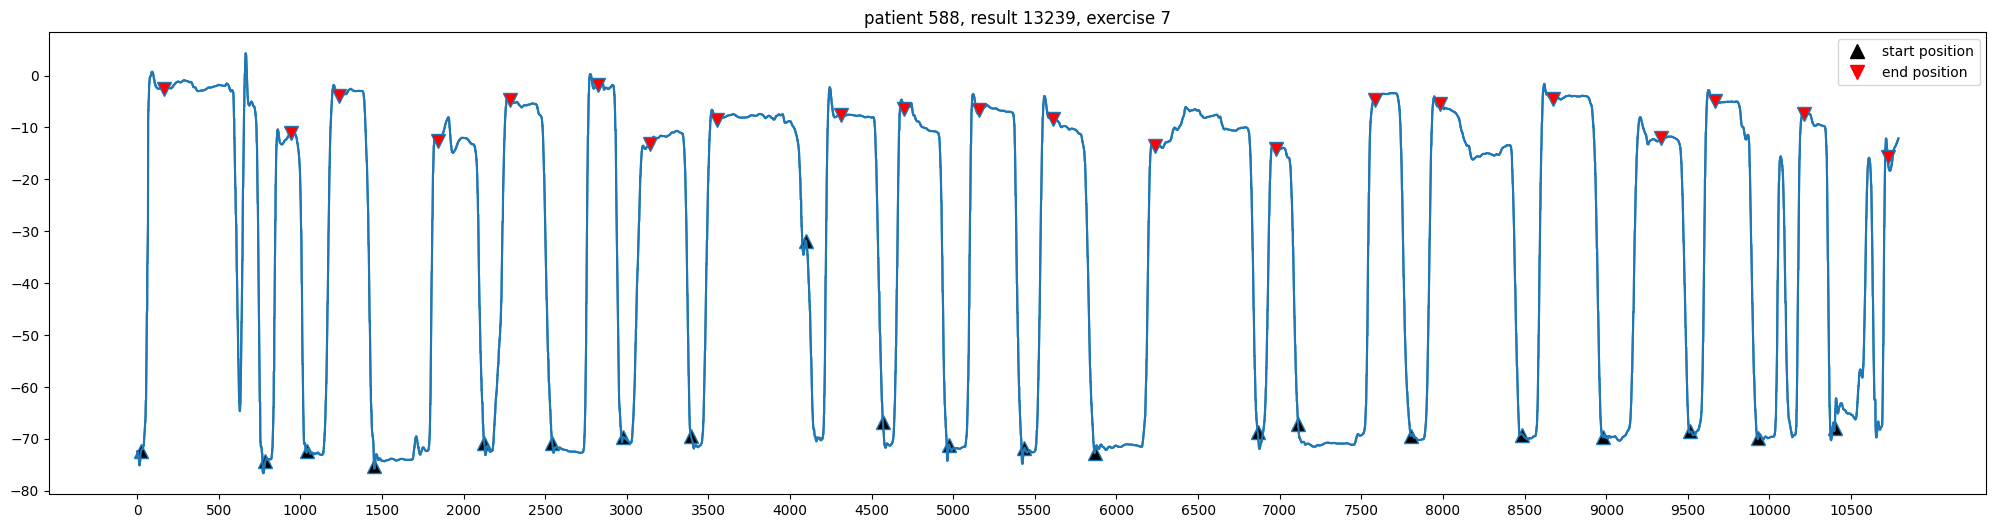

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13239, 588, 11000, 500) 

TypeError: mark_ranges() takes 0 positional arguments but 2 were given

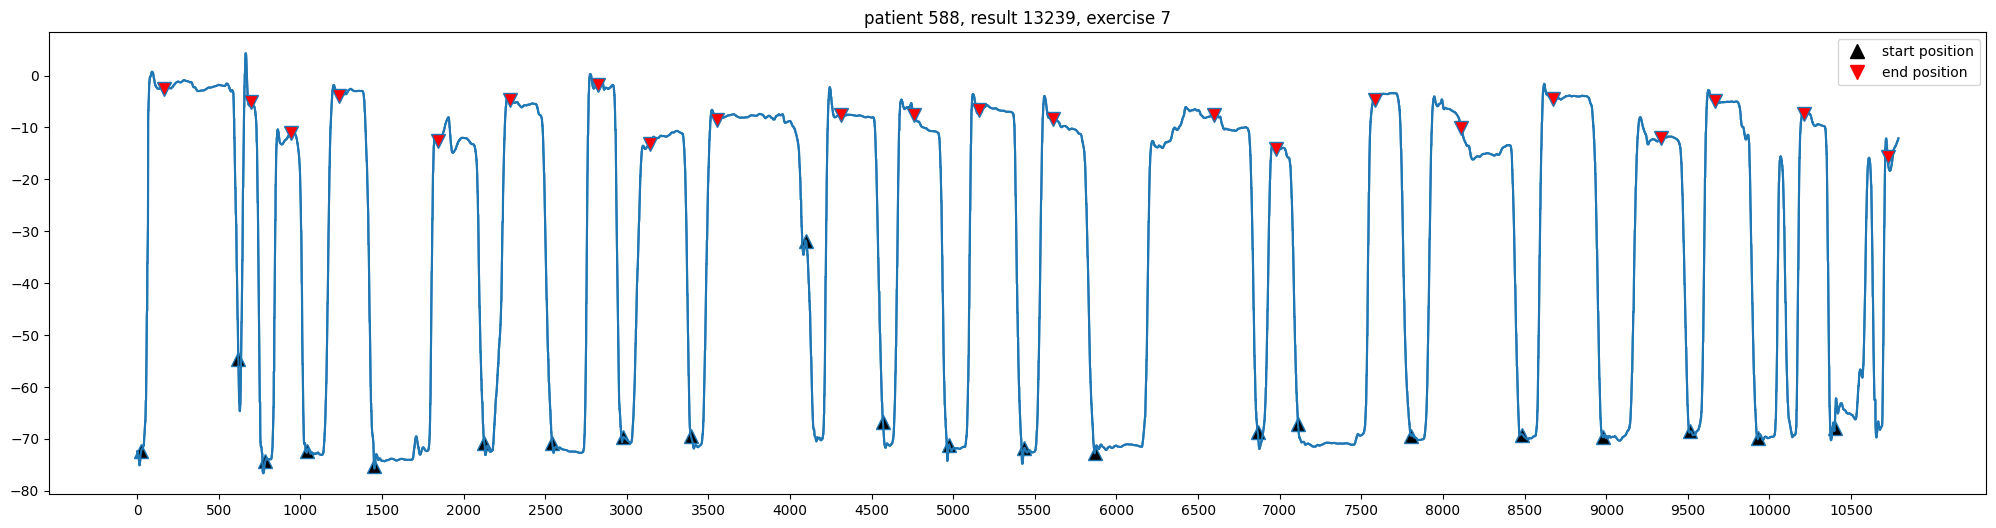

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs = add_sorted_marker_position(start_mark_locs, 620)

end_mark_locs = add_sorted_marker_position(end_mark_locs, 700)
end_mark_locs = remove_marker_by_index(end_mark_locs, 10)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 4760)
end_mark_locs = remove_marker_by_index(end_mark_locs, 13)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 6600)
end_mark_locs = remove_marker_by_index(end_mark_locs, 16)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 8110)

new_plot_game_result(start_mark_locs, end_mark_locs, 13239, 588, 11000, 500)
mark_ranges(start_mark_locs, end_mark_locs)
plot_mark_ranges(13239)

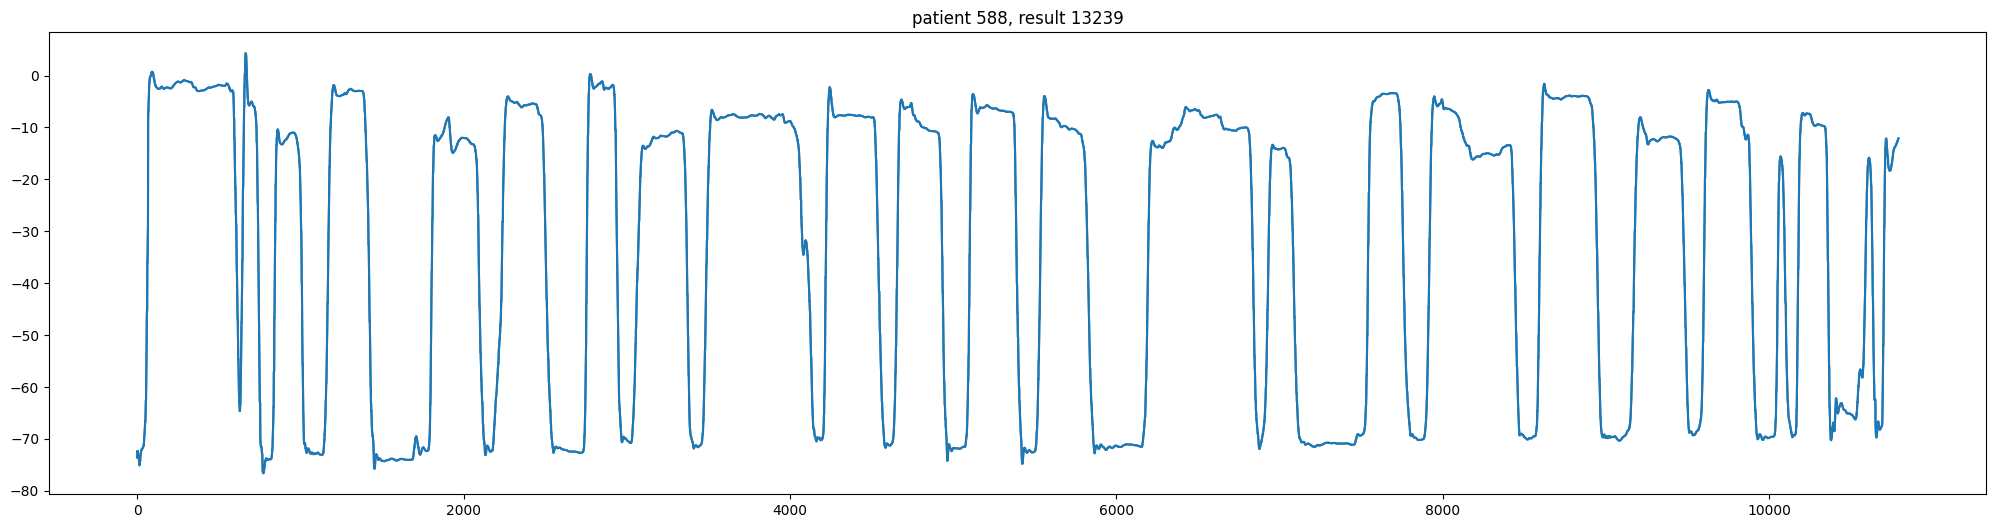

<Figure size 640x480 with 0 Axes>

In [ ]:
mark_ranges(start_mark_locs, end_mark_locs)
plot_mark_ranges(13239)

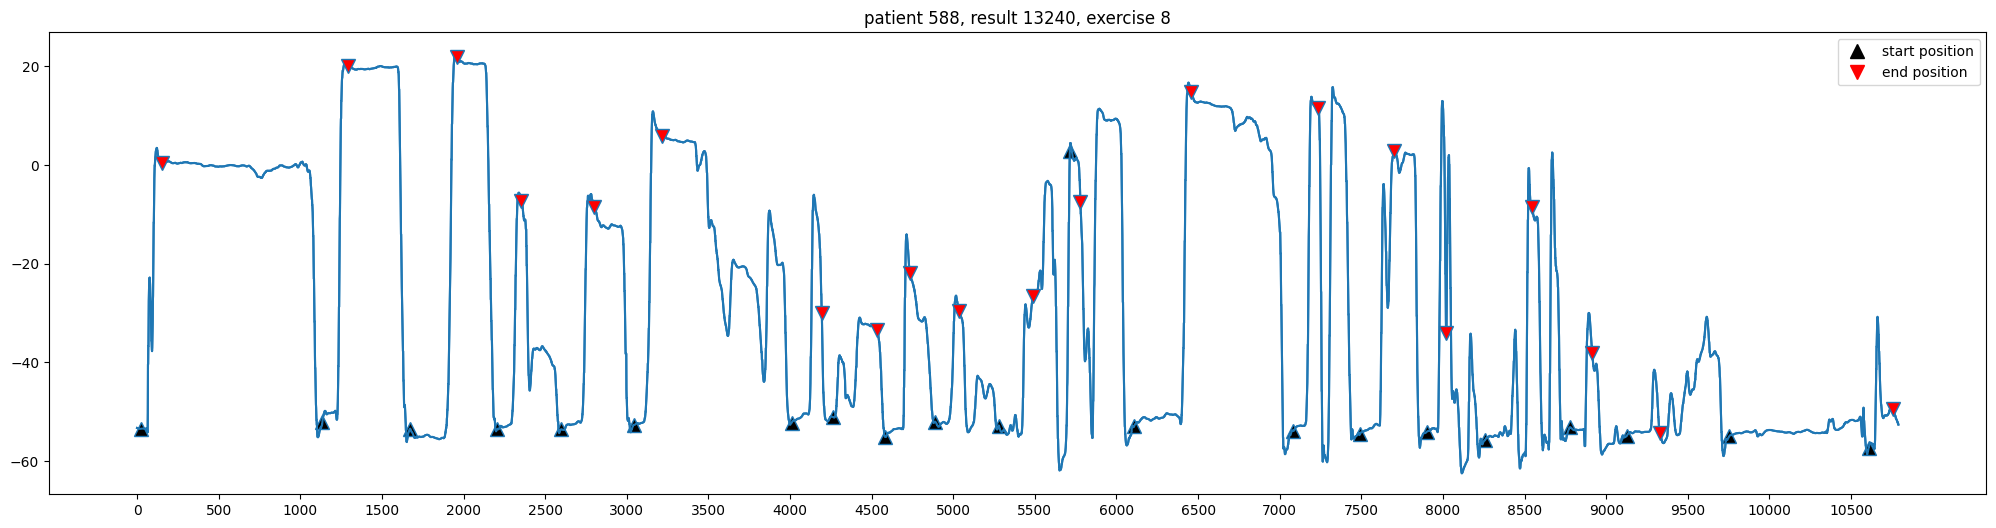

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13240, 588, 11000, 500)

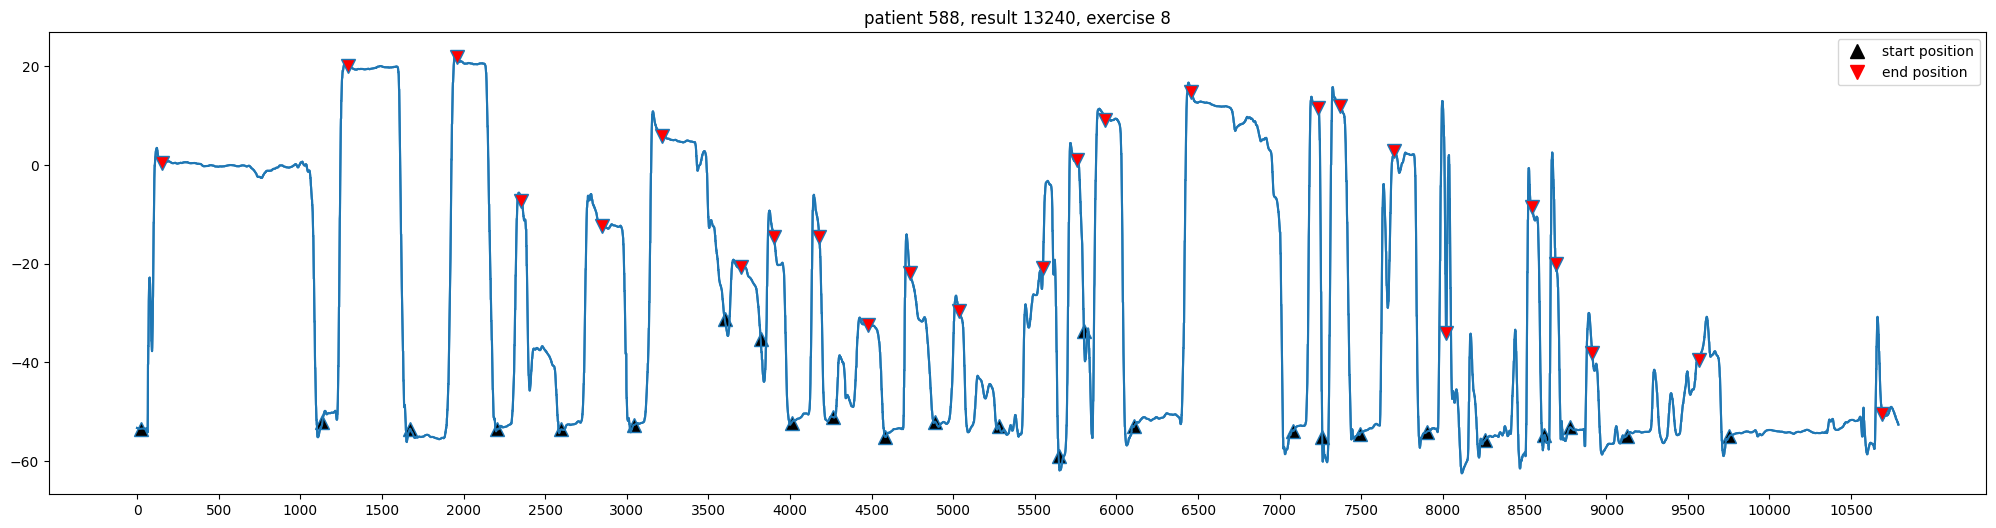

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs = add_sorted_marker_position(start_mark_locs, 3600)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 3820)
start_mark_locs = remove_marker_by_index(start_mark_locs, 13)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 5645)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 5800)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 7260)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 8620)
start_mark_locs = remove_marker_by_index(start_mark_locs, 25)

end_mark_locs = remove_marker_by_index(end_mark_locs, 4)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2850)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 3700)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 3900)
end_mark_locs = remove_marker_by_index(end_mark_locs, 8)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 4180)
end_mark_locs = remove_marker_by_index(end_mark_locs, 9)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 4480)
end_mark_locs = remove_marker_by_index(end_mark_locs, 12)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 5550)
end_mark_locs = remove_marker_by_index(end_mark_locs, 13)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 5760)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 5930)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 7370)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 8690)
end_mark_locs = remove_marker_by_index(end_mark_locs, 23)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 9570)
end_mark_locs = remove_marker_by_index(end_mark_locs, 24)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 10690)

new_plot_game_result(start_mark_locs, end_mark_locs, 13240, 588, 11000, 500)

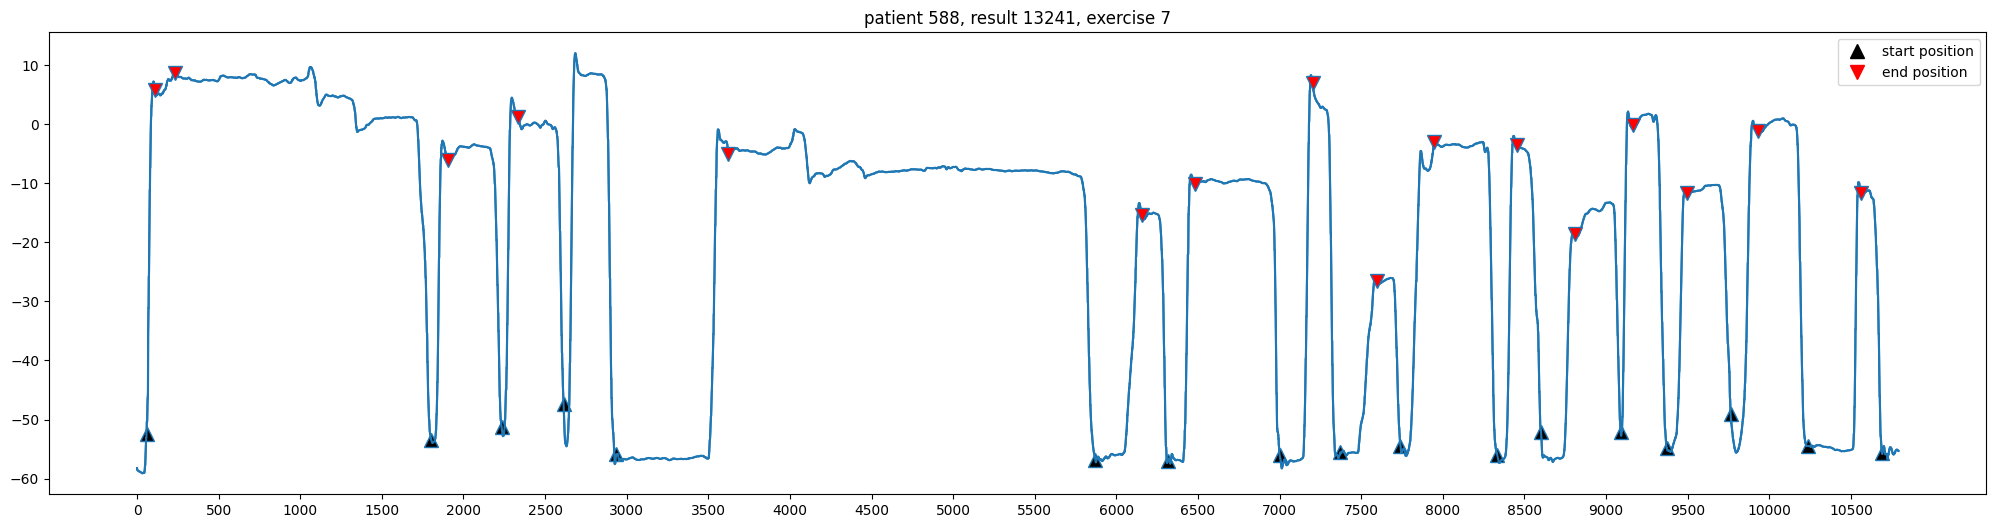

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13241, 588, 11000, 500)

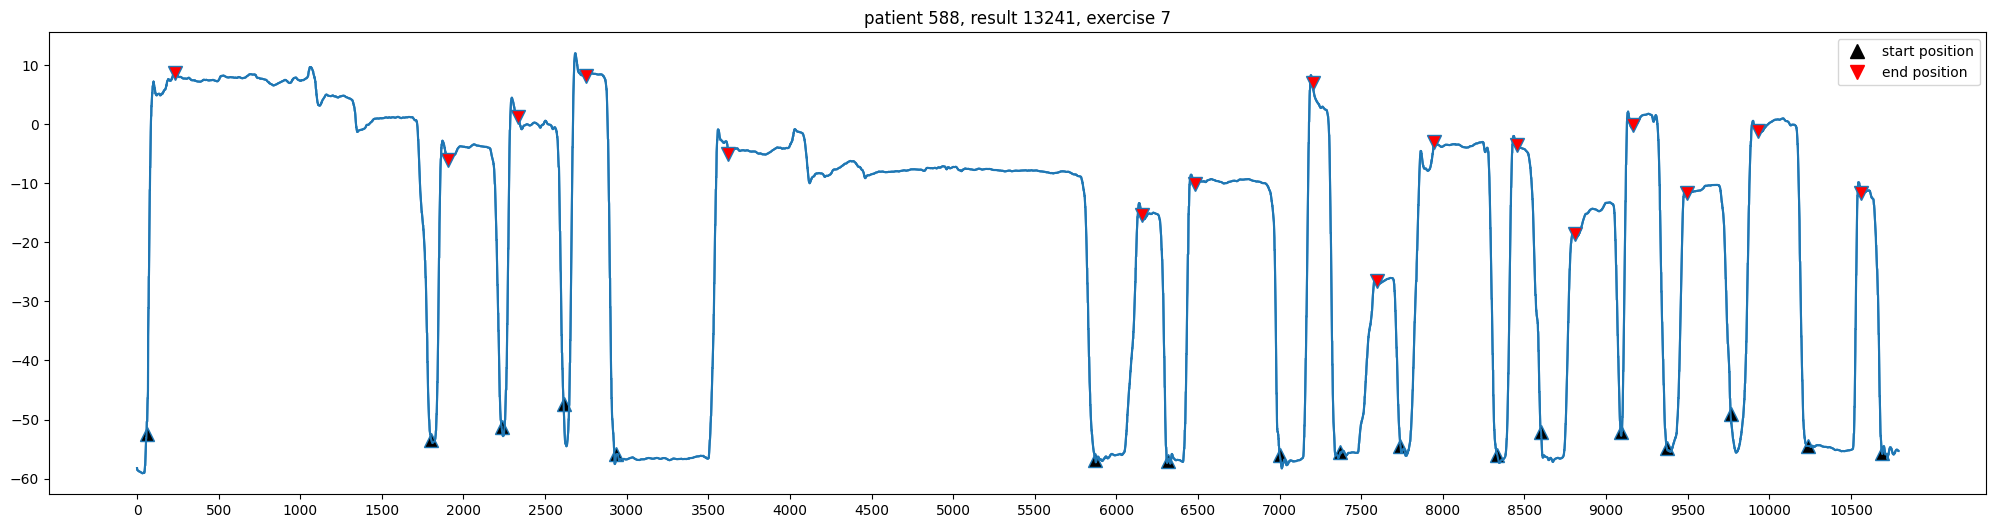

<Figure size 640x480 with 0 Axes>

In [ ]:
end_mark_locs = remove_marker_by_index (end_mark_locs, 0)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2750)

new_plot_game_result(start_mark_locs, end_mark_locs, 13241, 588, 11000, 500)

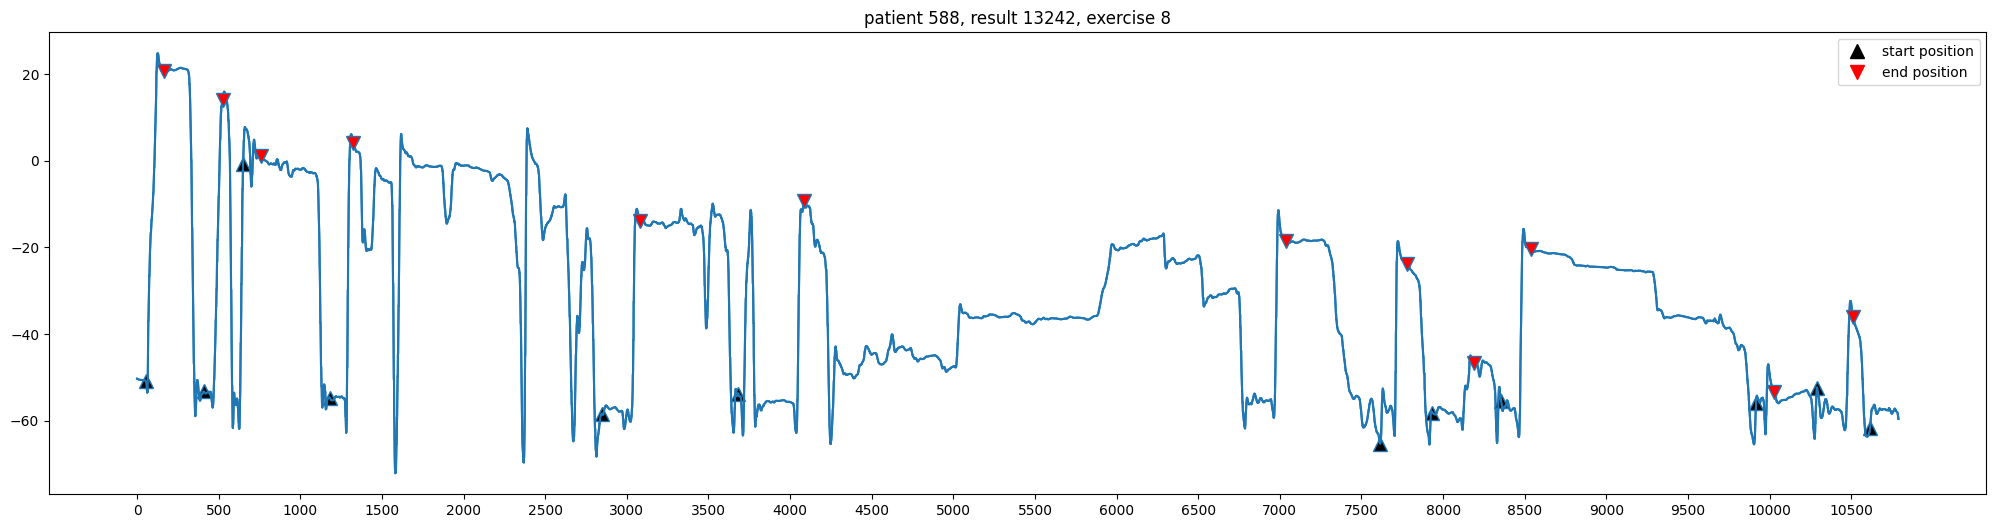

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13242, 588, 11000, 500) 

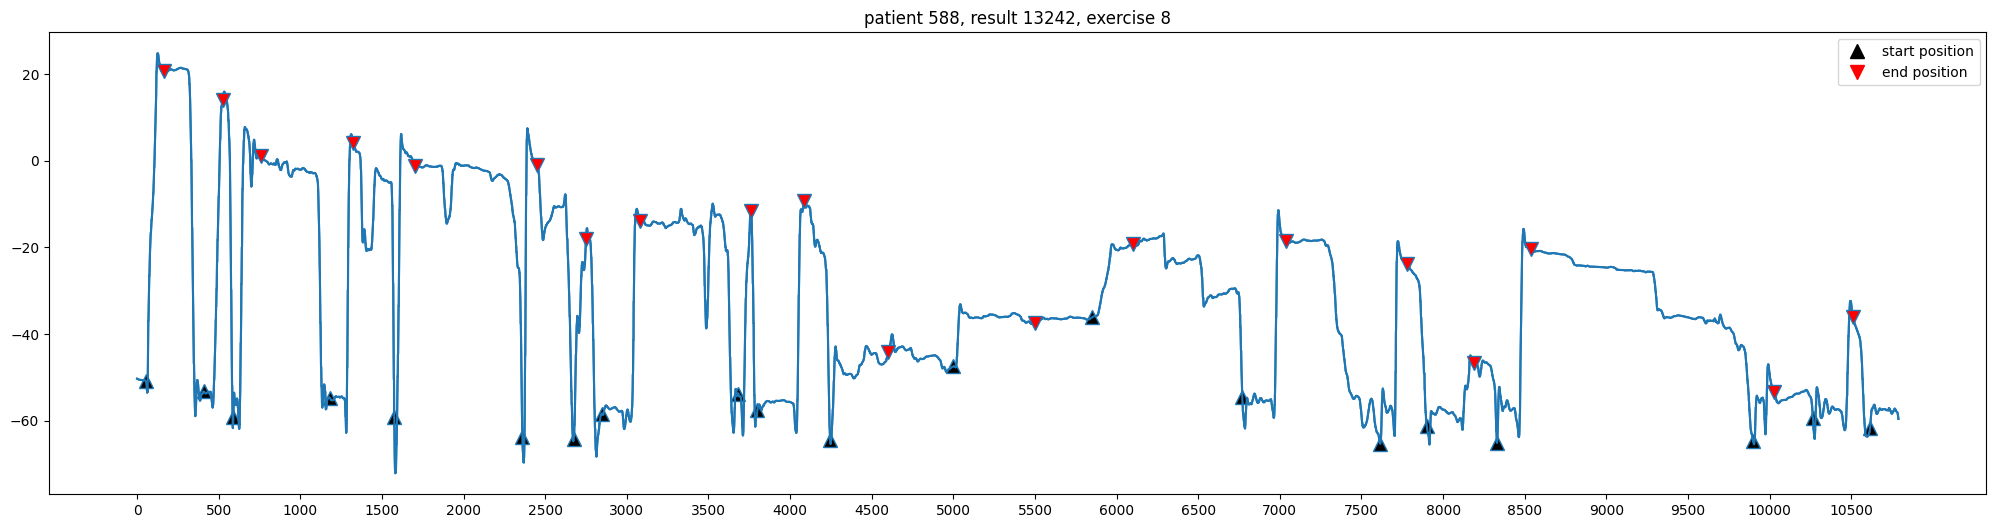

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs = remove_marker_by_index(start_mark_locs, 2)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 590)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 1575)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 2360)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 2675)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 3800)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 4245)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 5000)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 5850)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 6770)
start_mark_locs = remove_marker_by_index(start_mark_locs, 15)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 7900)
start_mark_locs = remove_marker_by_index(start_mark_locs, 16)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 8330)
start_mark_locs = remove_marker_by_index(start_mark_locs, 17)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 9900)
start_mark_locs = remove_marker_by_index(start_mark_locs, 18)
start_mark_locs = add_sorted_marker_position(start_mark_locs, 10265)

end_mark_locs = add_sorted_marker_position(end_mark_locs, 1700)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2450)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2750)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 3760)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 4600)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 5500)
end_mark_locs = add_sorted_marker_position(end_mark_locs, 6100)

new_plot_game_result(start_mark_locs, end_mark_locs, 13242, 588, 11000, 500)

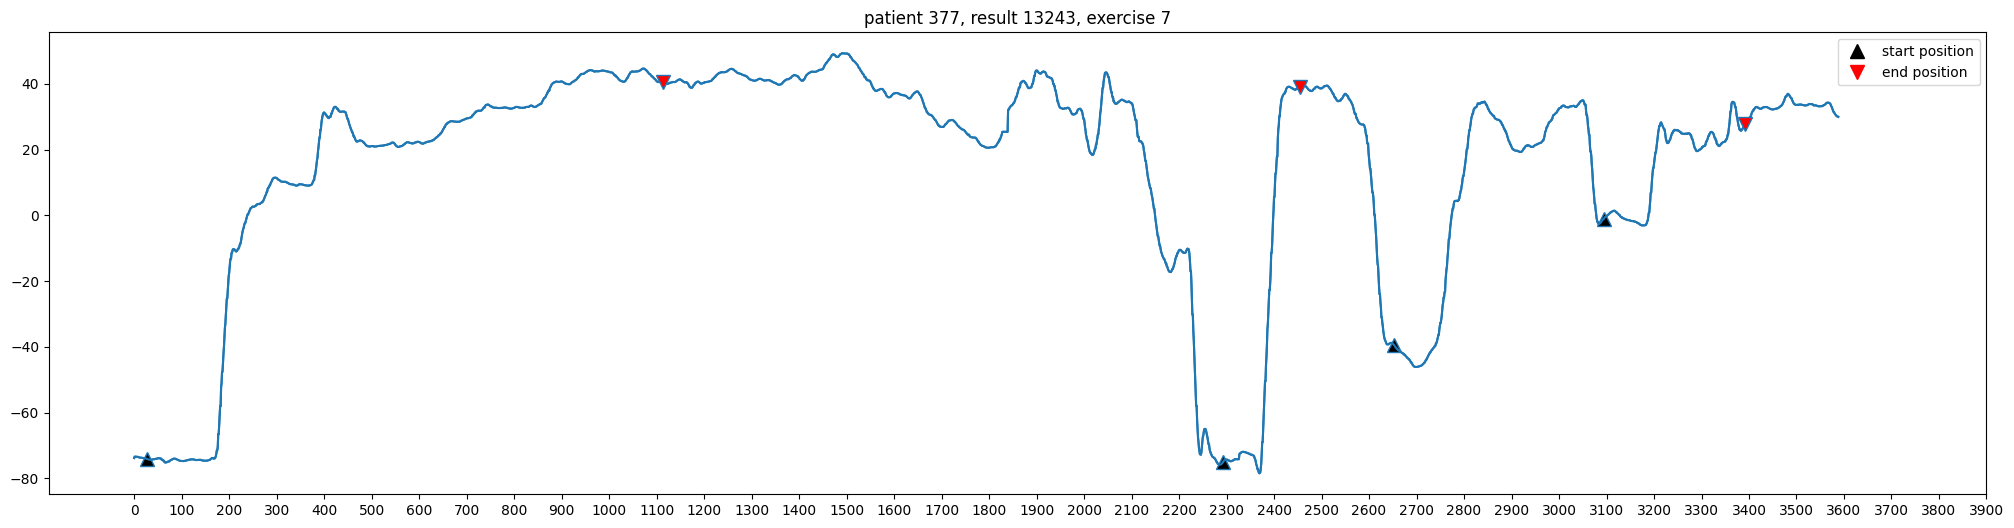

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13243, 377, 4000, 100) 

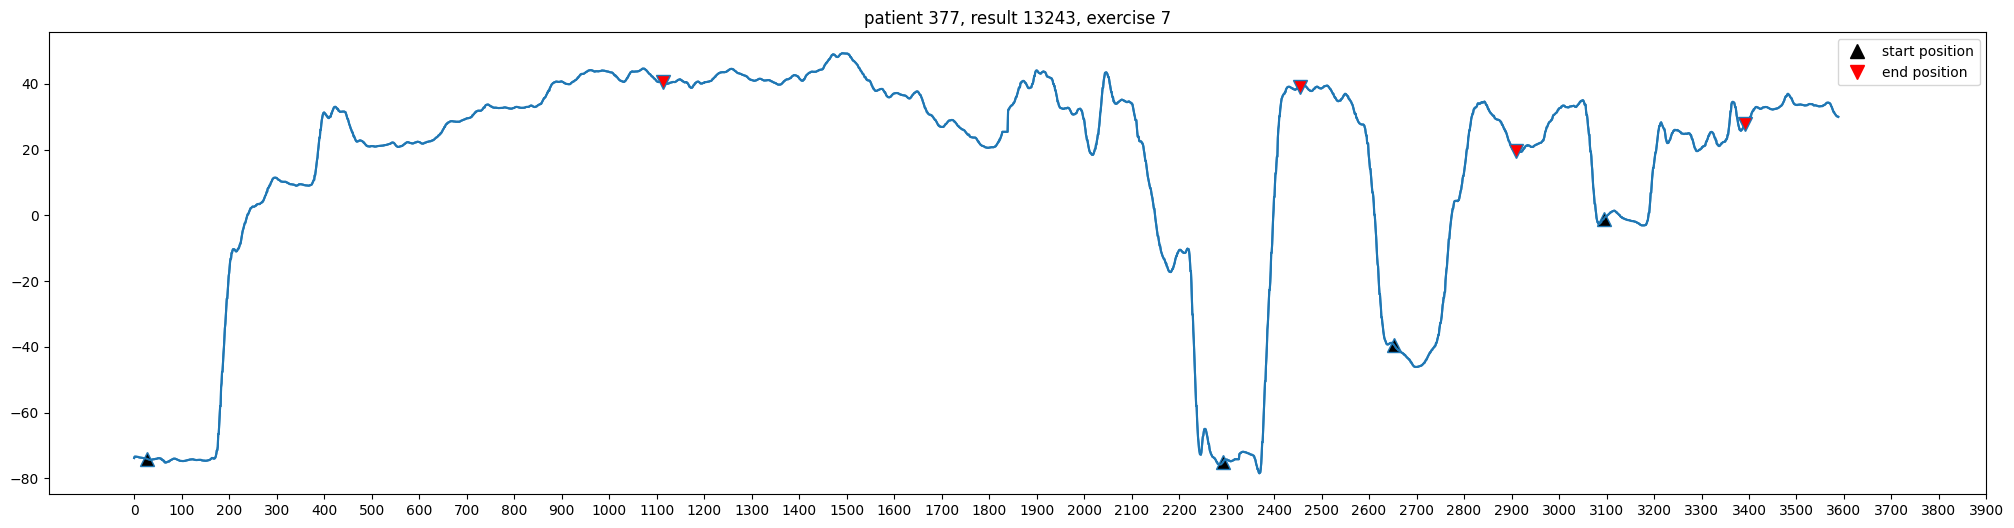

<Figure size 640x480 with 0 Axes>

In [ ]:
end_mark_locs = add_sorted_marker_position(end_mark_locs, 2910)

new_plot_game_result(start_mark_locs, end_mark_locs, 13243, 377, 4000, 100)

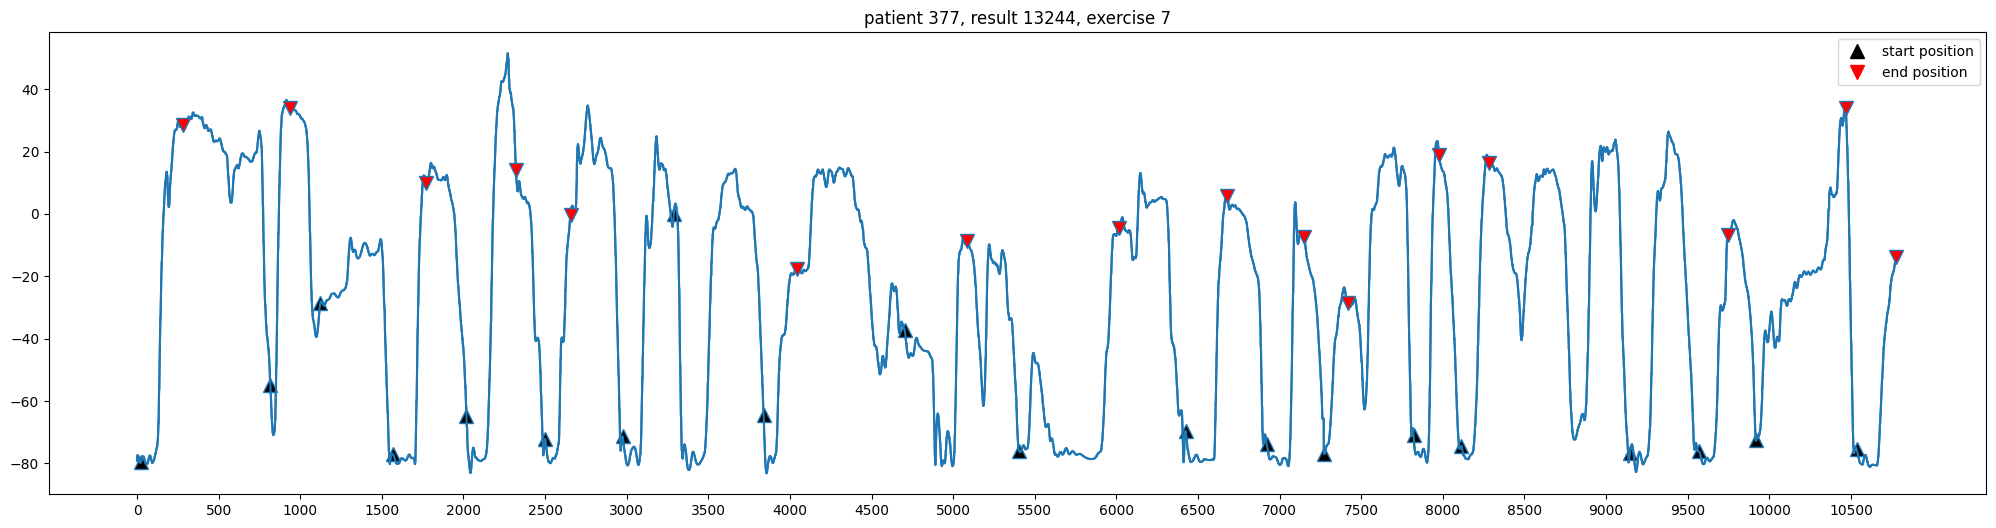

<Figure size 640x480 with 0 Axes>

In [ ]:
start_mark_locs, end_mark_locs = plot_game_result(13244, 377, 11000, 500) 

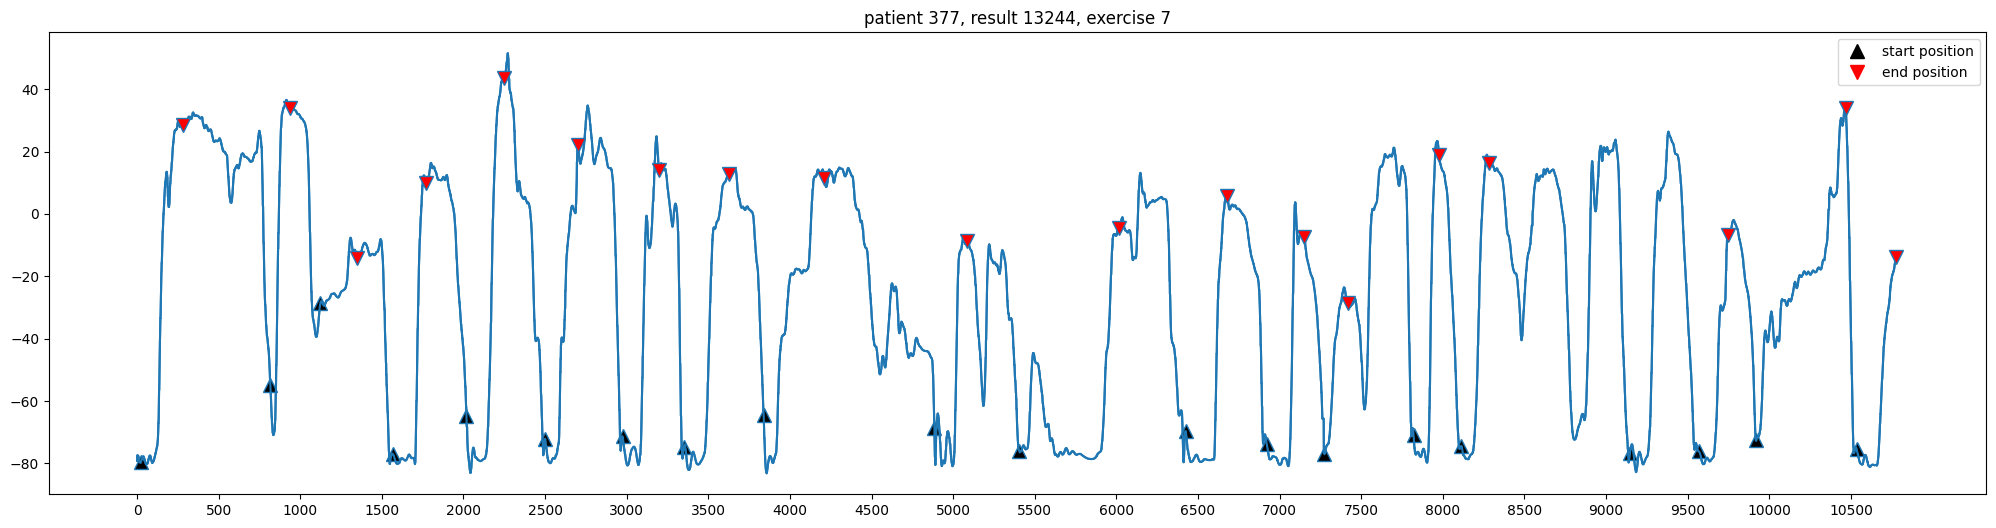

<Figure size 640x480 with 0 Axes>

In [ ]:
    start_mark_locs = remove_marker_by_index(start_mark_locs, 7)
    start_mark_locs = add_sorted_marker_position(start_mark_locs, 3350)
    start_mark_locs = remove_marker_by_index(start_mark_locs, 9)
    start_mark_locs = add_sorted_marker_position(start_mark_locs, 4885)

    end_mark_locs = add_sorted_marker_position(end_mark_locs, 1350)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 4)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 2250)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 5)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 2700)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 3200)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 3625)
    end_mark_locs = remove_marker_by_index(end_mark_locs, 8)
    end_mark_locs = add_sorted_marker_position(end_mark_locs, 4210)

    new_plot_game_result(start_mark_locs, end_mark_locs, 13244, 377, 11000, 500)